# Проект: A/B-тест в интернет-магазине

Совместно с отделом маркетинга крупного интернет-магазина подготовлен  список гипотез для увеличения выручки.
Необходиом приоритизировать гипотезы, запустить A/B-тест и проанализировав результаты - сделать выводы.


Описание данных:

**Файл /datasets/hypothesis.csv** - содержит информацию про 9 гипотез по увеличению выручки интернет-магазина


Hypothesis — краткое описание гипотезы;


Reach — охват пользователей по 10-балльной шкале;


Impact — влияние на пользователей по 10-балльной шкале;


Confidence — уверенность в гипотезе по 10-балльной шкале;


Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


**Файл /datasets/orders.csv** 

transactionId — идентификатор заказа;


visitorId — идентификатор пользователя, совершившего заказ;


date — дата, когда был совершён заказ;


revenue — выручка заказа;


group — группа A/B-теста, в которую попал заказ.

**Файл /datasets/visitors.csv**


date — дата;


group — группа A/B-теста;


visitors — количество пользователей в указанную дату в указанной группе A/B-теста


## Приоритизация гипотез

На данном этапе займемся приоритизацией гипотез: 

- Применим фреймворк ICE для приоритизации гипотез (с сортирвокой по убыванию приоритета);

- Примените фреймворк RICE для приоритизации гипотез (с сортирвокой по убыванию приоритета)

и сделаем выводы.

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from pandas.plotting import register_matplotlib_converters
import warnings


In [2]:
# прочитаем файл
hypothesis_df = pd.read_csv('C:/Users/asus/Downloads/hypothesis.csv') 
hypothesis_df

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
hypothesis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Перед нами 9 Гипотез с разбаллованными характеристиками. Уберем ограничения на вывод символов, чтобы прочитать гипотезы целеком. В типах данных все впорядке

In [4]:
pd.set_option('display.max_colwidth', None)

In [5]:
hypothesis_df.columns = hypothesis_df.columns.str.lower()
hypothesis_df

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Итак, теперь все в полном порядке. Создадим отдельные два отдельных датасета с разной приоритезацией гипотиз, с применением фреймворка **ICE и RICE**.

**ICE score** рассчитывается, как **(*impact * confidence) / effort***, то есть идет прямая завивисмоть от величины влияния на пользователей (impact) и уверенность в гипотезе (confidence) и обратная проворциональность затраты ресурсов на проверку гипотезы (effort), что вполне логично. 

Рассчитаем ICE, добавим столбец и сформируем новый df:

In [6]:
hypothesis_df['ICE'] = hypothesis_df['impact']*hypothesis_df['confidence'] / hypothesis_df['efforts']
hypothesis_ICE = hypothesis_df[['hypothesis', 'ICE','impact','confidence', 'efforts']].sort_values(by='ICE', ascending=False).round(2)
hypothesis_ICE

,hypothesis,ICE,impact,confidence,efforts
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20,9,9,5
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33,10,8,6
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20,7,8,5
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00,3,8,3
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00,3,7,3
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00,5,4,10
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33,2,2,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00,1,1,1


 С применением фреймворка ICE лидирует 8 гипотеза: "Запустить акцию, дающую скидку на товар в день рождения". 

Теперь похожие манипуляции проведем, применив фреймворк RICE для приоритизации гипотез (также по убыванию).

**RICE SCORE** расчитывается по формуле: **(*reach * impact * confidence) / effort*** (теперь еще учитывается  охват пользователей - reach)

In [7]:
hypothesis_df['RICE'] = hypothesis_df['reach']*hypothesis_df['impact']*hypothesis_df['confidence'] / hypothesis_df['efforts']
hypothesis_RICE = hypothesis_df[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False).round(2)
hypothesis_RICE

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


С применением фреймворка RICE с большим отрывом лидирует 7 гипотеза: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". 

Объединим данные и сделаем вывод:

In [8]:
hypothesis_df.sort_values(by='RICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


В результате приоритизации гипотез больше склоняюсь к фреймворку RICE, т.к. здесь уитывается больше показателей, и тогда лидировала **гипотеза №7**: 
"Добавить форму подписки на все основные страницы, чтобы собрать базу 
клиентов для email-рассылок", имея следующие баллы:

reach  (охват пользователей) - 10 баллов

impact (влияние на пользователей) - 7 баллов. 

сonfidence (уверенность в гипотезе)- 8 баллов


efforts (затраты ресурсов на проверку гипотезы) - 5 баллов. 

##  Анализ A/B-теста

Результаты проведенного  A/B-теста описаны в файлах /datasets/orders.csv и /datasets/visitors.csv. 

Изучим файлы и проведем анализ, на основе которого сделаем выводы, которые помогут отделу маркетинга

### Предобработка данных

Перед тем как приступить к работе с данными в представленных данных, необходимо произвести их стандартную предобработку

In [9]:
#прочитаем файлы
orders = pd.read_csv('C:/Users/asus/Downloads/orders.csv') 
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [10]:
visitors_df= pd.read_csv('C:/Users/asus/Downloads/visitors.csv') 
visitors_df.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [12]:
visitors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [13]:
orders.duplicated().sum()

0

In [14]:
visitors_df.duplicated().sum()

0

Пропусков и дубликатов нет - приятная новость. 

Необходимо переименовать названия столбцов в **orders** с идентификаторами заказов и пользователей (transactionId и  visitorId) - в змеиный регистр, более читабельный формат + привести к корректному формату столбец с датой (date) в обоих датафреумах - **orders и visitors**

In [15]:
orders = orders.rename(columns={
            'transactionId': 'transaction_id',
            'visitorId': 'visitor_id'
        })

In [16]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors_df['date'] = visitors_df['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [17]:
orders.info() 
print("-" * 30)
visitors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Интересно посмотреть, какие группы указаны в столбце group -  не затесались ли там неопознанные объекты:

In [18]:
orders['group'].unique()

array(['B', 'A'], dtype=object)

In [19]:
visitors_df['group'].unique()

array(['A', 'B'], dtype=object)

Все в порядке - указаны группы А и В в обоих датафреймах как и положено.

Предлагаю также проверить количетсвенные данные на качетсво (кол-во пользователей в день **visitors** и **выручки revenue**

In [20]:
visitors_df['visitors'].describe()

count     62.000000
mean     607.290323
std      114.400560
min      361.000000
25%      534.000000
50%      624.500000
75%      710.500000
max      770.000000
Name: visitors, dtype: float64

In [21]:
orders['revenue'].describe()

count    1.197000e+03
mean     8.348006e+03
std      3.919113e+04
min      5.000000e+01
25%      1.220000e+03
50%      2.978000e+03
75%      8.290000e+03
max      1.294500e+06
Name: revenue, dtype: float64

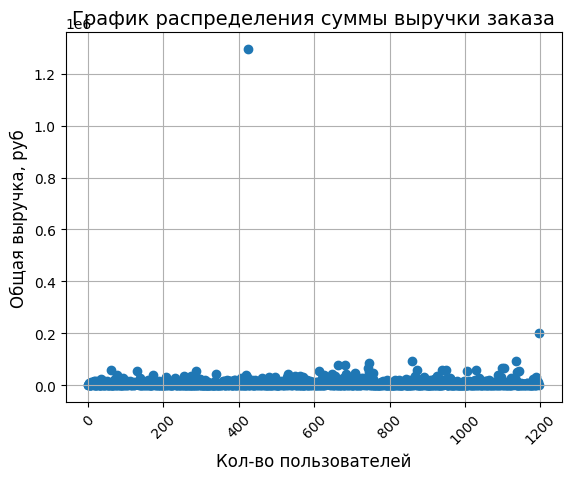

In [22]:
# посмотрим распределение величины на графике для наглядности:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 

plt.grid(visible=True)
plt.title('График распределения суммы выручки заказа', fontsize=14)
plt.xlabel('Кол-во пользователей', fontsize=12)
plt.ylabel('Общая выручка, руб', fontsize=12)
plt.xticks(rotation=45) 
plt.show()

В данных по посетителям на первый взгляд нет сомнительных даннных, а вот в выручках по заказам есть аутсайдеры - вернумся к данному вопросу далее в процессе тестирования.

Посмотрим, какой промежуток времени представлен:

In [23]:
print('Дата начала исследования:', orders['date'].min())
print('Окончание наблюдения:', orders['date'].max())

Дата начала исследования: 2019-08-01 00:00:00
Окончание наблюдения: 2019-08-31 00:00:00


In [24]:
print('Дата начала исследования:', visitors_df['date'].min())
print('Окончание наблюдения:', visitors_df['date'].max())

Дата начала исследования: 2019-08-01 00:00:00
Окончание наблюдения: 2019-08-31 00:00:00


Данные в исследуемых файлах представлены за один месяц - август 2019 года.

Проверим, нет ли пользователей, которые попали в обе группы тестирования:

In [25]:
double_users = orders.groupby('visitor_id').agg({'group' : 'nunique'}).reset_index().query('group>1')['visitor_id'].unique()
len(double_users)

58

Неожиданно, но факт - есть 58 пользователей, попавших в обе категории. Узнаем, какую долю от всех представленныз они составляют:

In [26]:
unique_user_count = orders['visitor_id'].nunique()
unique_user_count

1031

In [27]:
double = len(double_users)/unique_user_count*100

In [28]:
print(f"Количество уникальных пользователей: {unique_user_count}")
print(f"доля пользователей, попавших в обе группы тестирования: {double:.2f}%")

Количество уникальных пользователей: 1031
доля пользователей, попавших в обе группы тестирования: 5.63%


В принципе, доля таких пользователей в 5.63% не сильно сократит наши данные, но сделает их чище, так что исключим повторяющихся пользователей для чистоты эксперимента:

In [29]:
orders = orders.query('visitor_id not in @double_users')

Предобработка выполнена - данные датасета **orders и visitors_df** готовы для дальнейшего исследования

### график кумулятивной выручки по группам

Построим и исследуем график кумулятивной выручки по группам, сделаем выводы и предположения

Для работы соединим две таблицы orders visitors_df из представленных файлов о покупках и посетителях соответсвенно:

In [30]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors_df[np.logical_and(visitors_df['date'] <= x['date'], visitors_df['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


Данные готовы, теперь построим графики кумулятивной выручки по дням и группам A/B-тестирования: 

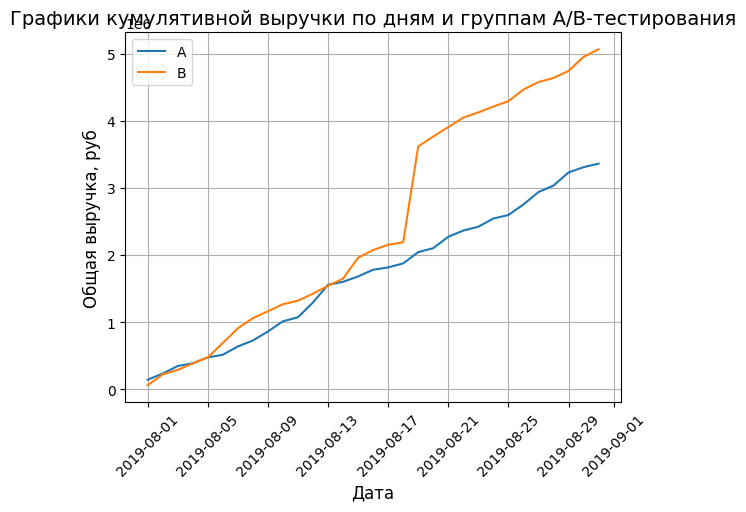

In [31]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend() 
plt.grid(visible=True)
plt.title('Графики кумулятивной выручки по дням и группам A/B-тестирования', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Общая выручка, руб', fontsize=12)
plt.xticks(rotation=45) 
plt.show()

По графику можно сделать вывод, что в целом выручка росла в обеих группах на всем протяжении теста, однако у группы В в разы лучше, особенно в период между 18 и 19 авг (предположительно) - произошел скачок, возможно - влияние аномальных покупок.

### график кумулятивного среднего чека по группам

Построим график кумулятивного среднего чека по группам, сделаем выводы и предположения.

Для построения графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

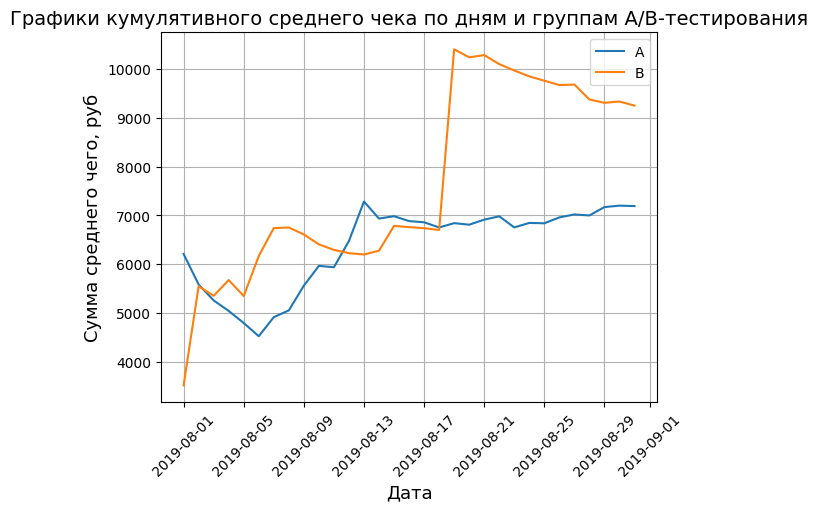

In [32]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')


plt.legend()
plt.grid(visible=True)
plt.title('Графики кумулятивного среднего чека по дням и группам A/B-тестирования', fontsize=14)
plt.xlabel('Дата', fontsize=13)
plt.ylabel('Сумма среднего чего, руб', fontsize=13)
plt.xticks(rotation=45) 
plt.show()

В первой половине проведения тестирования показатели среднего чека по обеим группам не стабильны, есть взлеты и падения, после 17 августа у группы А наблюдается стабилизация ситуации, а к концу даже увеличение среднего чека, в отличие от группы В: для нее мы наблюдаем снижение размера среднего чего сразу же после того самого скачка в районе 18-19 августа.

### График относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

Построим график относительного изменения кумулятивного среднего чека группы B к группе А, сделаем выводы и предположения.

In [33]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeRevenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,142779,23,59758,17
1,2019-08-02,234381,42,221801,40
2,2019-08-03,346854,66,288850,54
3,2019-08-04,388030,77,385740,68
4,2019-08-05,474413,99,475648,89


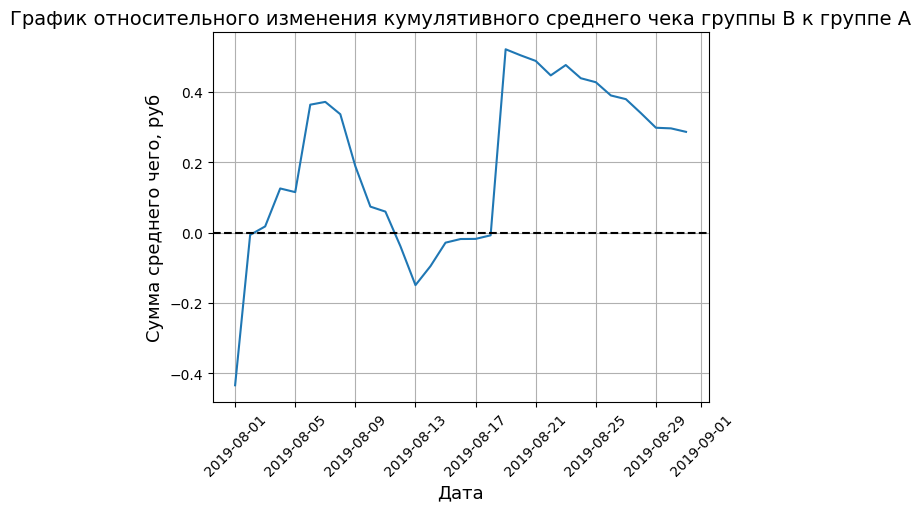

In [34]:
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.grid(visible=True)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', fontsize=14)
plt.xlabel('Дата', fontsize=13)
plt.ylabel('Сумма среднего чего, руб', fontsize=13)
plt.xticks(rotation=45) 
plt.show()

В основном наблюдается положительная тенденция - график отосительного изменения кумулятивного ср чека находится выше нуля, указывая на успешные дела группы В относительно группы А, однако наблюдаются скачки значений - возможно, отголоски аномалий.

### график кумулятивного среднего количества заказов на посетителя по группам

Построим график кумулятивного среднего количества заказов на посетителя по группам, сделаем выводы и предположения.

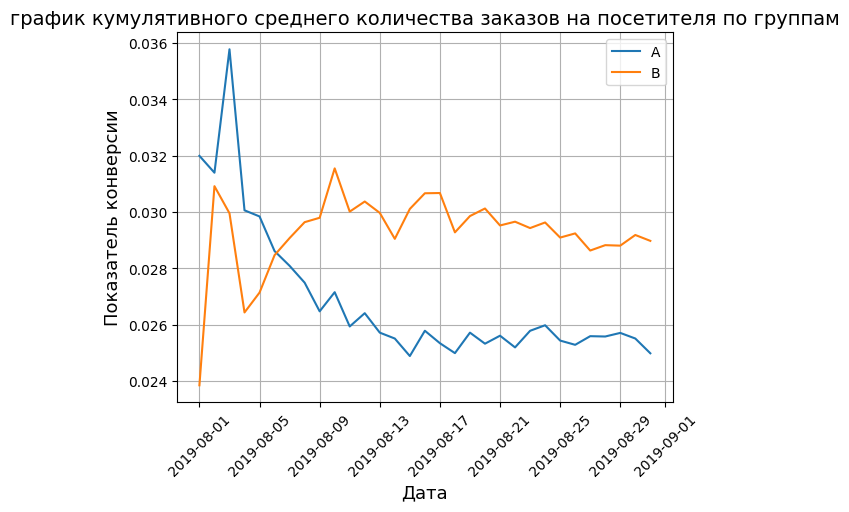

In [35]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.grid(visible=True)
plt.title('график кумулятивного среднего количества заказов на посетителя по группам', fontsize=14)
plt.xlabel('Дата', fontsize=13)
plt.ylabel('Показатель конверсии', fontsize=13)
plt.xticks(rotation=45) 
plt.show()


Можно сказать, что на момент начала тестирования по показателю конверсии, а следовательно и по количетсво заказов, лидировала группа А. Однако, как видно по графику, после 5 августа все изменилось в противоположную сторону и группа пользователей В вырвалась в лидеры с большим отрывом. 

Для группы **B** уровень конверсии теперь держится на показателе с ~ 0.029 - 0.032, для группы **А** - на уровне 0.025-0.027.
Предварительно, можно сделатб вывод, что нововведения подействовали положительно - количетсов заказов увеличилось.

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A, также сделаем выводы и предположения на основе полученного результата.

In [36]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeConversions.head()

,date,conversionA,conversionB
0,2019-08-01,0.031989,0.023843
1,2019-08-02,0.031390,0.030912
2,2019-08-03,0.035772,0.029950
3,2019-08-04,0.030055,0.026428
4,2019-08-05,0.029837,0.027134


No handles with labels found to put in legend.


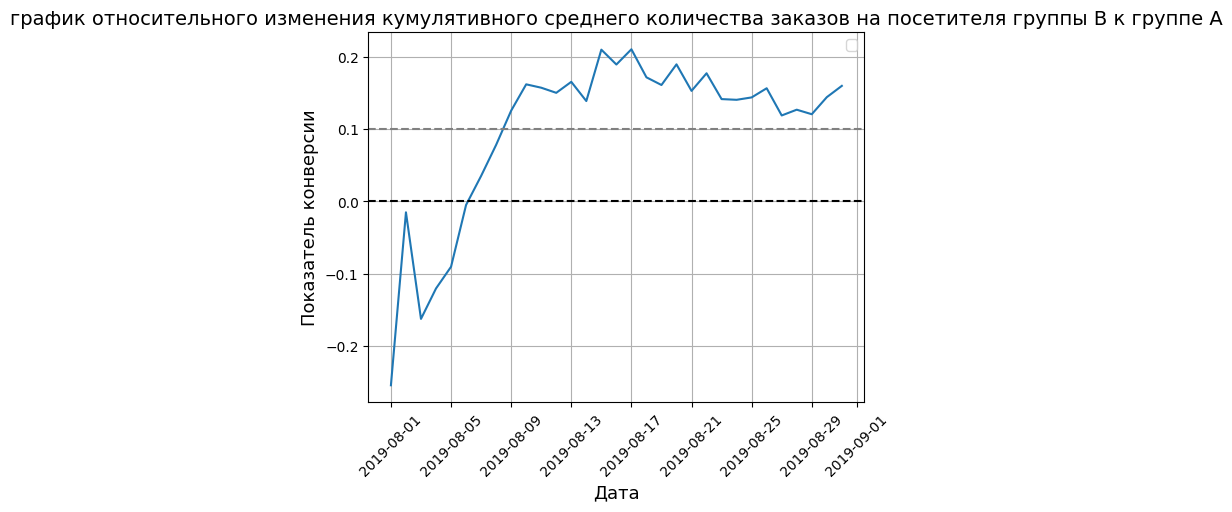

In [37]:
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.legend()

# строим графики
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.10, color='grey', linestyle='--')

plt.grid(visible=True)
plt.title('график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A', fontsize=14)
plt.xlabel('Дата', fontsize=13)
plt.ylabel('Показатель конверсии', fontsize=13)
plt.xticks(rotation=45) 
plt.show()

По графику мы видим, что в начале тестирования относительный прирост кол-ва заказов (будем считать конверсия) был отрицательный,
что подтвержает, что в начале введеных изменений ситуация была плачевной, однако, через несколько дней после новвоведений ситуация стала улучшаться, и уже после 5 августа видим нарастающие положительные изменения в количестве заказов, превышающие отметку в 10% стабильно за все рассматриваемое время, и достигающее 20% в том числе. Так что изменения пошли на пользу.

### Точечный график количества заказов по пользователям


Построимточечный график количества заказов по пользователям, проанализируем результат, сделаем выводы и предположения.

Подсчитаем количество заказов по пользователям и посмотрим на результат:

In [38]:
# соберу таблицу с количетсвом заказов по каждому пользователю:
orders_count_unique = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id' : 'nunique'})
)

orders_count_unique.columns = ['user_id', 'orders']

orders_count_unique.sort_values(by='orders', ascending=False).head()

,user_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3


Построим точечную диаграмму числа заказов на одного пользователя:

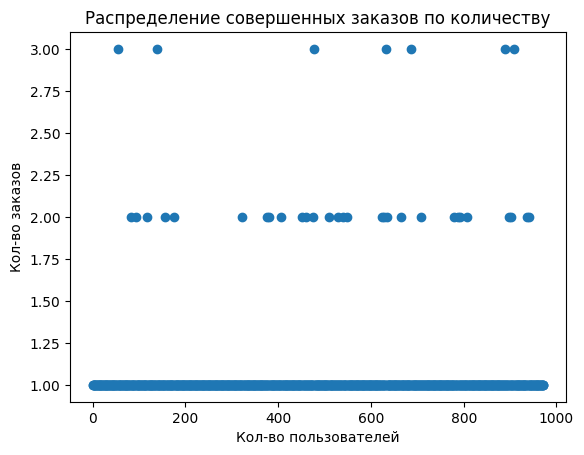

In [39]:
x_values = pd.Series(range(0,len(orders_count_unique)))

 
#построим график 
plt.scatter(x_values, orders_count_unique['orders'])
# зададим описание графика 
plt.ylabel('Кол-во заказов') 
plt.xlabel('Кол-во пользователей') 
plt.title('Распределение совершенных заказов по количеству') 
plt.show() 

Что ж, по графику распределения количества заказов, которые совершили пользователи, можно сделать вывод, что в основном кол-во заказов на пользователя составляет 1-2, меньше всего делают заказов от 3х - уже меньше, и соответсвенно от 6 заказов - единичные случаи. Аномалия ли это или вполне стандартная ситуация - предстоит теперь выяснить. 

### Граница для определения аномальных пользователей

В продолжении темы про аномалии посчитаем 95-й и 99-й перцентили количества заказов на пользователя, на основе чего будет выбрана граница для определения аномальных пользователей.

Посчитаем 95-й и 99-й перцентили количества заказов на одного пользователя:

In [40]:
print(np.percentile(orders_count_unique['orders'], [95, 99]))

[1. 2.]


Получается, что не более 5% пользователей соврешают более 1 заказа, и не более 1% - совершают более 2 заказов. На одного пользователя можно взять 2 заказа за верхнюю границу числа заказов, и отсеять остальных как аномальных пользователей.

### Точечный график стоимостей заказов

Построим точечный график стоимостей заказов, также свормулируем выводы и свои предположения.

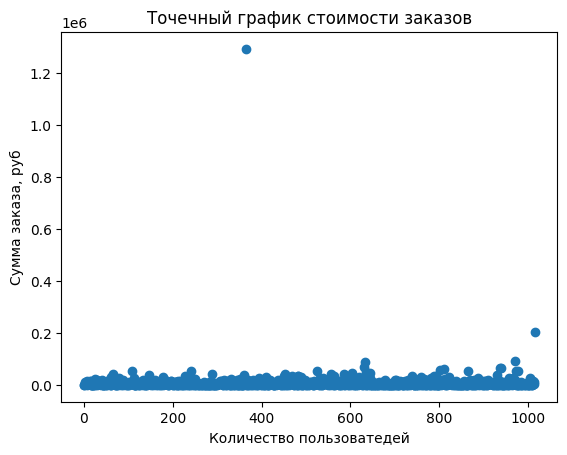

In [41]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])

plt.xlabel('Количество пользоватедей')
plt.ylabel('Сумма заказа, руб')
plt.title('Точечный график стоимости заказов')
plt.show()

Невооруженным глазом видно, что есть явные "выбросы" - заказы стоимостью более 1 200 000, и ~ 200 000. Думаю, что следует урезать область значений, а для того, чтобы сделать это более точно, рассчитаем 95-й и 99-й перцентили стоимости заказов.

### 95-й и 99-й перцентили стоимости заказов

In [42]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


Итак, менее 5% всех заказав имеют стоимость более 26 785, и не более 1% выходят на стоимость более 53904, поэтому **границей для аномальных заказов можно сделать стоимсоть заказа от 26 000.**

### Статистическая значимость различий в среднем количестве заказов по сырым данным

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным - т.е. без удаления аномальных пользователей.

Сформулируем гипотезы. 

**Нулевая Но**: различий в среднем количестве заказов между группами нет. 

**Альтернативная Н1**: различия в среднем между группами есть.

Т.к. данные сырые, т.е. не очищенные от выбросов, то будем использовать непараметрический тест Уилкоксона-Манна-Уитни.

Создадим переменные orders_by_users_A и orders_by_users_B со столбцами ['users_id', 'orders_count']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [43]:
orders_by_users_A = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_A.columns =  ['users_id', 'orders_count']

orders_by_users_B = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_B.columns =  ['users_id', 'orders_count']

display(orders_by_users_A.head())
display(orders_by_users_B.head())

,users_id,orders_count
0,11685486,1
1,54447517,1
2,66685450,1
3,78758296,1
4,85103373,1


,users_id,orders_count
0,5114589,1
1,6958315,1
2,39475350,1
3,47206413,1
4,48147722,1


Объявим переменные sample_A и sample_B, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. 

In [44]:
sample_A = pd.concat(
    [orders_by_users_A['orders_count'],
                      pd.Series(0, index=np.arange(visitors_df[visitors_df['group']=='A']['visitors'].sum() - len(orders_by_users_A['orders_count'])),
name='orders')
    ],
    axis=0)

sample_B = pd.concat(
    [orders_by_users_B['orders_count'],
                      pd.Series(0,index=np.arange(visitors_df[visitors_df['group']=='B']['visitors'].sum() - len(orders_by_users_B['orders_count'])),
name='orders')
    ], 
    axis=0)

Данные готовы, гипотезы сформулированы, перейдем к тестировани, уровень статистической значимости установим 0.05

In [45]:
print('p-value составляет:', "{0:.3f}".format(stats.mannwhitneyu(sample_A, sample_B)[1]))

print('относительный прирост среднего числа заказов группы B составляет:', "{0:.3f}".format(sample_B.mean() / sample_A.mean() - 1))

p-value составляет: 0.011
относительный прирост среднего числа заказов группы B составляет: 0.160


Т.к. полученный показатель p-value = 0.011, что менее 0.05, то длеаем вывод, **что по «сырым» данным различия в среднем числе заказов групп A и B есть**, нулевую гипотезу отвергаем. Также это подкрепляется **показателем прироста заказов группы В - почти на 16% больше, чем в групее А, довольно не плохой результат**

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

 Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.
 
 Гипотезы сформулируем следующим образом:
 
**Нулевая гипотеза Но**: различий в средних чеках между группами нет;

**Альтернативная гипотеза Н1**: различия в средних чеках между группами присутствуют.

**Уровень стат. значимости: 0.05**

In [46]:
print('p-value составляет:', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('относительный прирост стоимости среднего чека группы B составляет:', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value составляет: 0.829
относительный прирост стоимости среднего чека группы B составляет: 0.287


Т.к. полученный показатель p-value = 0.829, что сильно больше 0.05, то длеаем вывод, что **по «сырым» данным различия в стоимости среднего чека  групп A и B нет, нулевую гипотезу не отвергаем**. Что странно, т.к. **относительный прирост стоимости среднего чека группы В относительно гр. А составляет почти 29%**. Значит, сырые данные стоит все же почистить и избавиться от аномалий, которые, скорее всего, и искажают истинную картину дел.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Теперь произведем тот же тест, но теперь уже на очищенных данных, т.е. без аномалий и выбросов. В качестве границ нормальных значений нам понадобятся результаты прошлых этапов, в которых вычисляли  95-й и 99-й перцентили.

Примем за **аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 26 000 рублей**

Узнаем, сколько всего аномальных пользователей:

In [47]:
users_with_many_orders = pd.concat(
    [
        orders_by_users_A[orders_by_users_A['orders_count'] > 2]['users_id'],
        orders_by_users_B[orders_by_users_B['orders_count'] > 2]['users_id'],
    ],
    axis=0,
)
users_with_expensive_orders = orders[orders['revenue'] > 26000]['visitor_id']

annormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(annormal_users.head(5))
print('количество аномальных пользователей:', annormal_users.shape[0])

568     113298937
1099    148427295
461     154576532
928     204675465
33      249864742
dtype: int64
количество аномальных пользователей: 61


Под сокращение попадают 55 пользователей

Узнаем, как их действия данных пользователей повлияли на результаты теста, уровень стат.значимости также 0.05.

Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [48]:
# фильтруем данные группы А
sample_A_filtr = pd.concat(
    [
        orders_by_users_A[
            np.logical_not(orders_by_users_A['users_id'].isin(annormal_users))
        ]['orders_count'],
        pd.Series(
            0,
            index=np.arange(
                visitors_df[visitors_df['group']=='A']['visitors'].sum() - len(orders_by_users_A['orders_count'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# фильтруем данные группы В
sample_B_filtr = pd.concat(
    [
        orders_by_users_B[
            np.logical_not(orders_by_users_B['users_id'].isin(annormal_users))
        ]['orders_count'],
        pd.Series(
            0,
            index=np.arange(
                visitors_df[visitors_df['group']=='B']['visitors'].sum() - len(orders_by_users_B['orders_count'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)  

Также применим статистический критерий Манна-Уитни к полученным отфильтрованным выборкам, стат. значимость = 0.05, 

**Сформулируем гипотезы:**

**Нулевая Но: различий в среднем количестве заказов между группами нет.**

**Альтернативная Н1: различия в среднем количестве заказов между группами есть**

In [49]:
print('p-value составляет:', '{0:.3f}'.format(stats.mannwhitneyu(sample_A_filtr, sample_B_filtr)[1]))
print('относительный прирост среднего числа заказов группы B составляет:', '{0:.3f}'.format(sample_B_filtr.mean()/sample_A_filtr.mean()-1))

p-value составляет: 0.013
относительный прирост среднего числа заказов группы B составляет: 0.180


В этот раз, при анализе уже очищенных данных, **p-value=0.009 < 0.05, также говорит нам, что различия в среднем числе заказов групп A и B есть, и нулевая гипотеза о их равенстве также отвергается.**

**Показателем прироста заказов группы В относительно группы А стал больше ~ 19%**


Проверим, как обстоит дело со средними чеками.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

Посчитаем статистическую значимость различий в среднем чеке заказа между группами уже по «очищенным» данным. 

Гипотезы сформулируем следующим образом:
 
**Нулевая гипотеза Но**: различий в средних чеках между группами нет;

**Альтернативная гипотеза Н1**: различия в средних чеках между группами присутствуют.

**Уровень стат. значимости: 0.05**

In [50]:
print('p-value равен:'
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(annormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(annormal_users)),
                )
            ]['revenue'],
        )[1]
    )
)

print('относительный прирост стоимости среднего чека группы B составляет относительно группы А:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(annormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(annormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value равен:0.615
относительный прирост стоимости среднего чека группы B составляет относительно группы А: -0.056


**Полученный p-value = 0.762, что снова намного > 0.05. Значит, отвергать нулевую гипотезу и считать, что в среднем чеке по «очищенным» данным между группами есть различия, нет оснований**. По «сырым» данным p-value был равен 0.729, т.е. разница небольшая. Однако мы помним, что по сырым данным было противоречие - **тогда средний чек группы В на порядок превышал чек группы А.**

**А сейччас по «очищенным» данным средний чек группы А больше среднего чека группы В** (на 2.2%), несмотря на то, что заказов в группе В больше.


## Вывод

В результате приоритизации гипотез лидировала гипотеза №7: 
**"Добавить форму подписки на все основные страницы, чтобы собрать базу 
клиентов для email-рассылок"**, имея следующие баллы:

reach  (охват пользователей) - 10 баллов


impact (влияние на пользователей) - 7 баллов. 


сonfidence (уверенность в гипотезе)- 8 баллов


efforts (затраты ресурсов на проверку гипотезы) - 5 баллов. 


Относительно **решения по результатам теста** предполагаю следующее: т.к. в ходе теста выяснилось, что группа В лидирует по количеству заказов, но несмотря на это значимых различий (улучшений) в приросте среднего чека группы В не оказалось, т.е. нужных значимых различий по данному критерию между группами А и В не наблюдается - с этим выводом предлагаю закончить тест. 